In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [27]:
file_one = "COVID-19_Weekly_Lab_Testing_Public.csv"

In [28]:
file_one_df = pd.read_csv(file_one)

In [29]:
file_one_df.head()

,objectid,week_duration,weekly_bexar_county_total_tests,weekly_bexar_county_negative_an,weekly_bexar_county_positive_te
0,1,5/1 - 5/7,47775.0,46942.0,833.0
1,2,5/8 - 5/14,37553.0,36695.0,858.0
2,3,5/15-5/21,47834.0,47234.0,600.0
3,4,5/22 - 5/28,45240.0,44603.0,637.0
4,5,5/29 - 6/4,32241.0,31868.0,373.0


In [30]:
file_one_df = file_one_df.dropna(how='any')

In [31]:
file_one_df = file_one_df.dropna(how='any')
file_one_df

,objectid,week_duration,weekly_bexar_county_total_tests,weekly_bexar_county_negative_an,weekly_bexar_county_positive_te
0,1,5/1 - 5/7,47775.0,46942.0,833.0
1,2,5/8 - 5/14,37553.0,36695.0,858.0
2,3,5/15-5/21,47834.0,47234.0,600.0
3,4,5/22 - 5/28,45240.0,44603.0,637.0
4,5,5/29 - 6/4,32241.0,31868.0,373.0
5,6,6/5 - 6/11,28118.0,27684.0,434.0
6,7,6/12 - 6/18,29324.0,28955.0,369.0
7,8,6/19 - 6/25,10390.0,9992.0,398.0
8,9,6/26 - 7/2,10897.0,10263.0,634.0
9,10,7/3 - 7/9,8673.0,7702.0,971.0


In [32]:
clean_Data = file_one_df.rename(
   columns={"week_duration":"Week Duration","weekly_bexar_county_total_tests": "Weekly county total test","weekly_bexar_county_negative_an":"Weekly negative test","weekly_bexar_county_positive_te":"Weekly postive test"})

In [33]:
clean_Data 

,objectid,Week Duration,Weekly county total test,Weekly negative test,Weekly postive test
0,1,5/1 - 5/7,47775.0,46942.0,833.0
1,2,5/8 - 5/14,37553.0,36695.0,858.0
2,3,5/15-5/21,47834.0,47234.0,600.0
3,4,5/22 - 5/28,45240.0,44603.0,637.0
4,5,5/29 - 6/4,32241.0,31868.0,373.0
5,6,6/5 - 6/11,28118.0,27684.0,434.0
6,7,6/12 - 6/18,29324.0,28955.0,369.0
7,8,6/19 - 6/25,10390.0,9992.0,398.0
8,9,6/26 - 7/2,10897.0,10263.0,634.0
9,10,7/3 - 7/9,8673.0,7702.0,971.0


In [34]:
del clean_Data["objectid"]

In [35]:
clean_Data

,Week Duration,Weekly county total test,Weekly negative test,Weekly postive test
0,5/1 - 5/7,47775.0,46942.0,833.0
1,5/8 - 5/14,37553.0,36695.0,858.0
2,5/15-5/21,47834.0,47234.0,600.0
3,5/22 - 5/28,45240.0,44603.0,637.0
4,5/29 - 6/4,32241.0,31868.0,373.0
5,6/5 - 6/11,28118.0,27684.0,434.0
6,6/12 - 6/18,29324.0,28955.0,369.0
7,6/19 - 6/25,10390.0,9992.0,398.0
8,6/26 - 7/2,10897.0,10263.0,634.0
9,7/3 - 7/9,8673.0,7702.0,971.0


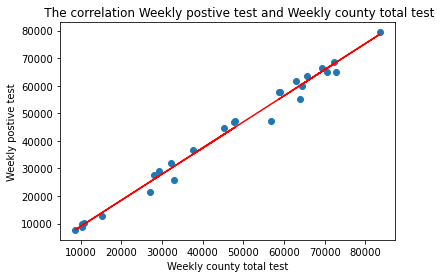

In [36]:
X = clean_Data.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = clean_Data.iloc[:,2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
# Set x axis label
plt.xlabel("Weekly county total test")
# Set y axis label
plt.ylabel("Weekly postive test")
plt.title( "      The correlation Weekly postive test and Weekly county total test")
plt.show()

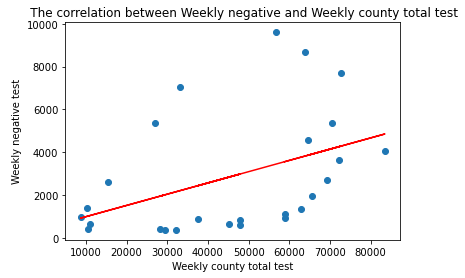

In [37]:
X = clean_Data.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = clean_Data.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
# Set x axis label
plt.xlabel("Weekly county total test")
# Set y axis label
plt.ylabel("Weekly negative test")
plt.title( "      The correlation between Weekly negative and Weekly county total test")
plt.show()

In [38]:
Week_Duration_data = clean_Data.groupby('Week Duration')
Week_Duration_data.head()

,Week Duration,Weekly county total test,Weekly negative test,Weekly postive test
0,5/1 - 5/7,47775.0,46942.0,833.0
1,5/8 - 5/14,37553.0,36695.0,858.0
2,5/15-5/21,47834.0,47234.0,600.0
3,5/22 - 5/28,45240.0,44603.0,637.0
4,5/29 - 6/4,32241.0,31868.0,373.0
5,6/5 - 6/11,28118.0,27684.0,434.0
6,6/12 - 6/18,29324.0,28955.0,369.0
7,6/19 - 6/25,10390.0,9992.0,398.0
8,6/26 - 7/2,10897.0,10263.0,634.0
9,7/3 - 7/9,8673.0,7702.0,971.0


In [39]:
dates = Week_Duration_data["Week Duration"].unique()


In [40]:
Total_data = clean_Data.loc[:, ['Week Duration', 'Weekly county total test']]
Total_data

,Week Duration,Weekly county total test
0,5/1 - 5/7,47775.0
1,5/8 - 5/14,37553.0
2,5/15-5/21,47834.0
3,5/22 - 5/28,45240.0
4,5/29 - 6/4,32241.0
5,6/5 - 6/11,28118.0
6,6/12 - 6/18,29324.0
7,6/19 - 6/25,10390.0
8,6/26 - 7/2,10897.0
9,7/3 - 7/9,8673.0


In [41]:
Total_data.sum()

Week Duration               5/1 - 5/75/8 - 5/145/15-5/215/22 - 5/28 5/29 -...
Weekly county total test                                            1183184.0
dtype: object

In [42]:
negative_data = clean_Data.loc[:, ['Week Duration', 'Weekly negative test']]
negative_data

,Week Duration,Weekly negative test
0,5/1 - 5/7,46942.0
1,5/8 - 5/14,36695.0
2,5/15-5/21,47234.0
3,5/22 - 5/28,44603.0
4,5/29 - 6/4,31868.0
5,6/5 - 6/11,27684.0
6,6/12 - 6/18,28955.0
7,6/19 - 6/25,9992.0
8,6/26 - 7/2,10263.0
9,7/3 - 7/9,7702.0


In [43]:
negative_data.sum()

Week Duration           5/1 - 5/75/8 - 5/145/15-5/215/22 - 5/28 5/29 -...
Weekly negative test                                            1108962.0
dtype: object

In [44]:
postive_data = clean_Data.loc[:, ['Week Duration', 'Weekly postive test']]
postive_data

,Week Duration,Weekly postive test
0,5/1 - 5/7,833.0
1,5/8 - 5/14,858.0
2,5/15-5/21,600.0
3,5/22 - 5/28,637.0
4,5/29 - 6/4,373.0
5,6/5 - 6/11,434.0
6,6/12 - 6/18,369.0
7,6/19 - 6/25,398.0
8,6/26 - 7/2,634.0
9,7/3 - 7/9,971.0


In [45]:
postive_data.sum()

Week Duration          5/1 - 5/75/8 - 5/145/15-5/215/22 - 5/28 5/29 -...
Weekly postive test                                              74222.0
dtype: object

In [46]:
new_data = clean_Data.loc[:, [ 'Weekly county total test','Weekly negative test','Weekly negative test']]
new_data 

,Weekly county total test,Weekly negative test,Weekly negative test
0,47775.0,46942.0,46942.0
1,37553.0,36695.0,36695.0
2,47834.0,47234.0,47234.0
3,45240.0,44603.0,44603.0
4,32241.0,31868.0,31868.0
5,28118.0,27684.0,27684.0
6,29324.0,28955.0,28955.0
7,10390.0,9992.0,9992.0
8,10897.0,10263.0,10263.0
9,8673.0,7702.0,7702.0


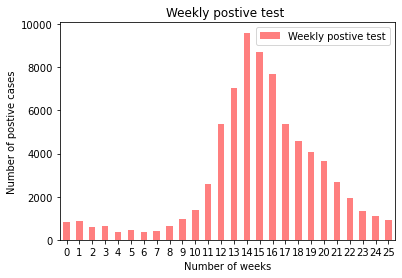

In [49]:
axes = postive_data .plot.bar(
    rot=0, subplots=True,color='r', alpha=0.5, align="center")
plt.title("Weekly postive test ")
plt.xlabel("Number of weeks")
plt.ylabel("Number of postive cases")
plt.show()

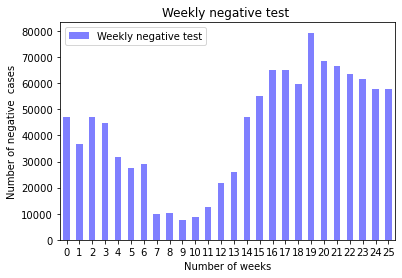

In [24]:
axes_data= negative_data.plot.bar(
    rot=0, subplots=True,color='b', alpha=0.5, align="center")
plt.title("Weekly negative test ")
plt.xlabel("Number of weeks")
plt.ylabel("Number of negative  cases")
plt.show()